## **Seaborn**

# Importing Necessory libraries


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Reading The Data

In [4]:
df.shape # 244 rows and 7 columns

(244, 7)

In [5]:
df.head() # first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.tail() # last 5 rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
df.columns # columns names

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.info() # data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
df.describe(include='all').T # summary statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


In [10]:
df.isnull().sum() # missing values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
df.notnull().sum() # non-missing values

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [12]:
df.duplicated().sum() # duplicated rows

np.int64(1)

In [13]:
df.drop_duplicates(inplace=True) # drop duplicated rows

In [14]:
df.duplicated().sum() # check if duplicated rows are dropped

np.int64(0)

In [15]:
df.head() # check if duplicated rows are dropped

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
df.groupby('day')['tip'].sum() #sum of tips on each day

day
Thur    169.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [17]:
df.groupby(['day','sex'])['tip'].sum() #sum of tips

day   sex   
Thur  Male       89.41
      Female     80.42
Fri   Male       26.93
      Female     25.03
Sat   Male      181.95
      Female     78.45
Sun   Male      186.78
      Female     60.61
Name: tip, dtype: float64

In [18]:
df.groupby(['day','sex']).agg({'tip':'sum', 'total_bill':'mean'}).reset_index() #sum of tips and mean of total bill

,day,sex,tip,total_bill
0,Thur,Male,89.41,18.714667
1,Thur,Female,80.42,16.835161
2,Fri,Male,26.93,19.857000
3,Fri,Female,25.03,14.145556
4,Sat,Male,181.95,20.802542
5,Sat,Female,78.45,19.680357
6,Sun,Male,186.78,21.887241
7,Sun,Female,60.61,19.872222


In [19]:
df['time'].unique() #to see the unique values in the column

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [20]:
df['time'].nunique() # to see the number of unique values in the column

2

In [21]:
df['tip'].nlargest(1) # to get the largest value in the column

170    10.0
Name: tip, dtype: float64

In [22]:
df['tip'].nsmallest(1) # to get the smallest value in the column

67    1.0
Name: tip, dtype: float64

In [23]:
df['time'].value_counts() # to see the frequency of each value in the column

time
Dinner    176
Lunch      67
Name: count, dtype: int64

In [24]:
df.sort_values(by='total_bill',ascending=False).head(10) # to get the top 10 rows with the highest total_bill

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


In [25]:
# Gender Analysis
gender_analysis = df.groupby('sex')[['total_bill', 'tip']].mean() # to get the average total_bill and tip for each
print('\nGender Analysis:\n', gender_analysis)


Gender Analysis:
         total_bill       tip
sex                         
Male     20.744076  3.089618
Female   18.115698  2.843140


In [26]:
df.groupby('sex').agg({'tip':'mean','total_bill':'mean'}) # to get the average tip and total_bill 

,tip,total_bill
sex,,
Male,3.089618,20.744076
Female,2.843140,18.115698


## Data Visualization

palatte

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [27]:
df.groupby('day')['tip'].mean()

day
Thur    2.784098
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

# 1.Bar Plot / Count Plot

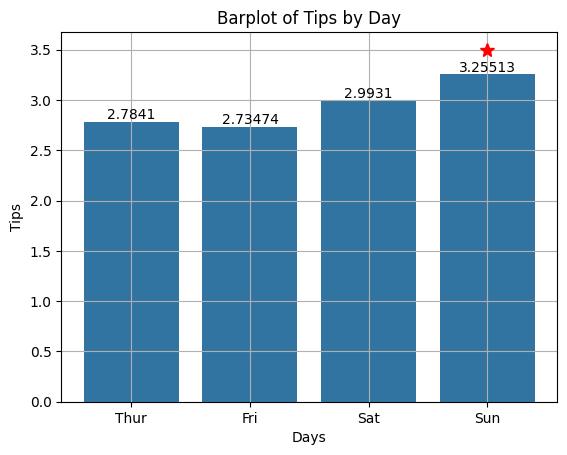

In [28]:
ax = sns.barplot(data=df, x='day', y ='tip', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.plot('Sun', 3.5, 'r*', markersize=10)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Tips')
plt.title('Barplot of Tips by Day')
plt.show()

# 2. Countplot

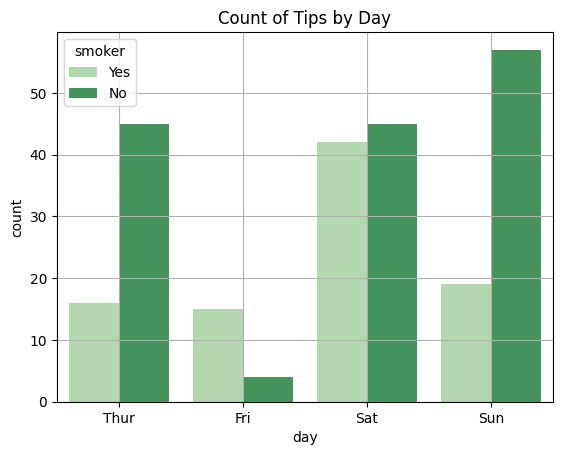

In [29]:
sns.countplot(data=df, x='day', hue='smoker', palette='Greens')
plt.grid(True)
plt.title('Count of Tips by Day')
plt.show()

# 3. Pie Chart

In [30]:
Smoker = df['smoker'].value_counts()
Smoker

smoker
No     151
Yes     92
Name: count, dtype: int64

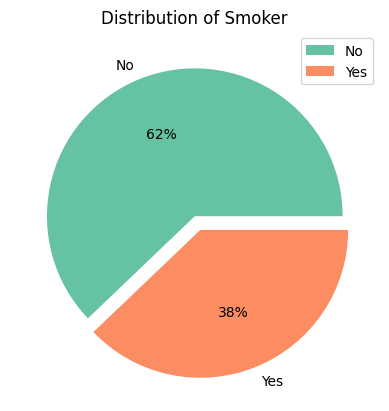

In [31]:
plt.pie(Smoker, labels=Smoker.index, autopct='%1.f%%', explode=[0, 0.1], colors=sns.color_palette('Set2'))
plt.legend()
plt.title('Distribution of Smoker')
plt.show()

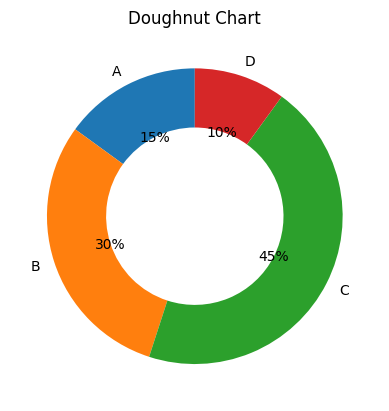

In [32]:
categories = ['A', 'B', 'C', 'D']
values = [15, 30, 45, 10]

plt.pie(values, labels=categories, autopct='%1.f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title("Doughnut Chart")
plt.show()

In [33]:
sns.color_palette('winter')

[(0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.8588235294117647, 0.5705882352941176)]

# 4. Scatter Plot

In [34]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

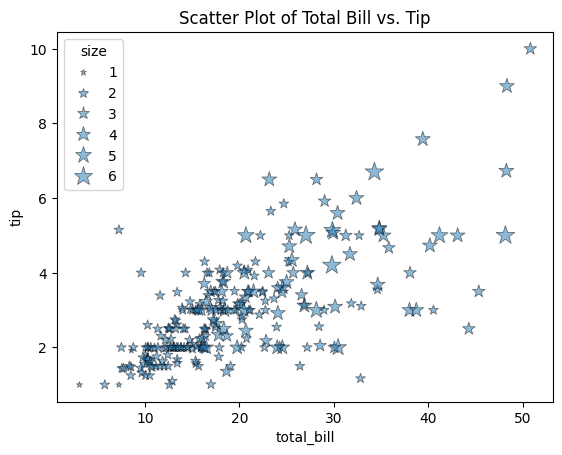

In [35]:
sns.scatterplot(data=df, x='total_bill', y='tip', alpha = 0.5, marker='*', edgecolor='black',legend=True, size="size", sizes=(20, 200)) #p,s,h,d,x,^,+,*,-
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.show()

# 5.Combining Plots

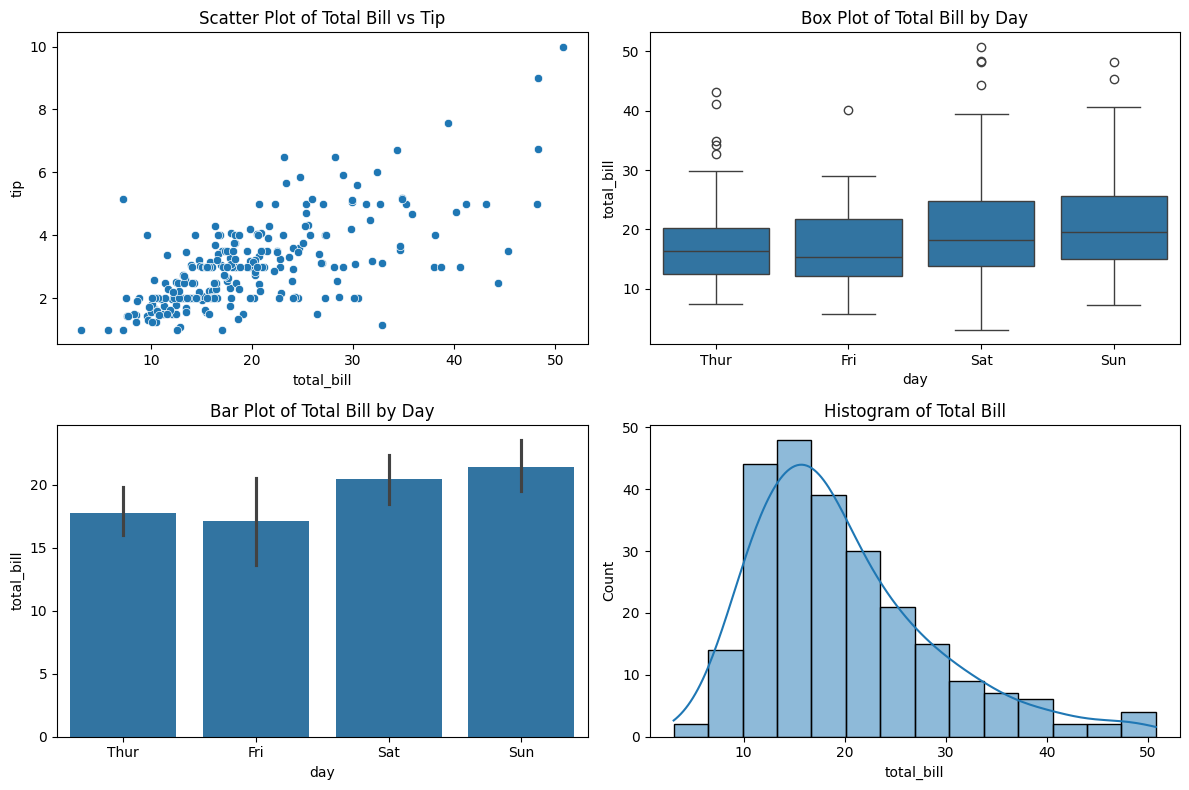

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')

plt.subplot(2, 2, 3)
sns.barplot(x='day', y='total_bill', data=df)
plt.title('Bar Plot of Total Bill by Day')

plt.subplot(2, 2, 4)
sns.histplot(df['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.tight_layout() # Improves the layout of the plots
plt.show()

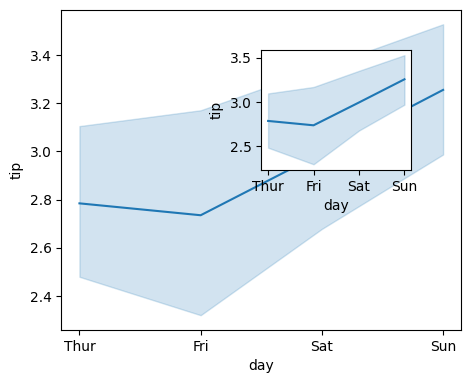

In [37]:
def graph():
    sns.lineplot(x = df["day"],y = df["tip"])
 
    # Creating a new figure with width = 5 inches
# and height = 4 inches
fig = plt.figure(figsize =(5, 4))
 
# Creating first axes for the figure
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
 
# plotting the graph
graph()
 
# Creating second axes for the figure
ax2 = fig.add_axes([0.5, 0.5, 0.3, 0.3])
 
# plotting the graph
graph()
 

# 6. Line Plot

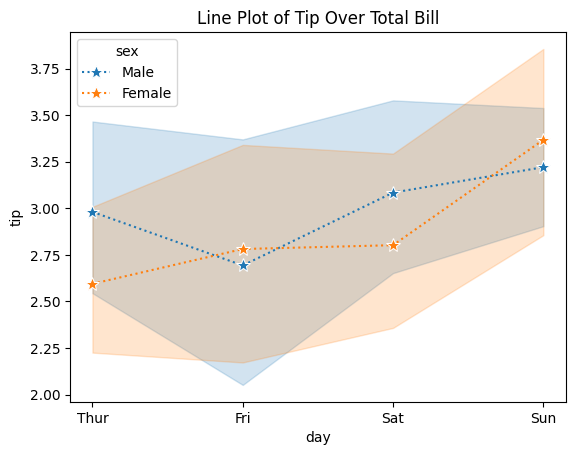

In [38]:
sns.lineplot(data=df, x='day', y='tip', hue='sex', orient="x", marker='*', markersize=10, linestyle=':')
plt.title('Line Plot of Tip Over Total Bill')
plt.show()